## Cluster Assignment: Identify top - 5 countries that are direst need of AID

 #### Categorise the countries using some socio-economic and health factors that determine the overall development of the country
 # Task 1

In [1]:

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# import libraries

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
# importing Data set
df=pd.read_csv(r"C:\Users\PRABHAKAR AANNA\Downloads\Clustering Assignment\Country-data.csv")
df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## subtask 1.1
# Inspect the dataframe / Check the structure of the data

Inspect the dataframe's columns, shapes,info,describe, variable types etc.

In [3]:
# converting the percentage values"exports,health, imports " into actual values

df['exports']= df['exports']* df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100
df['imports']= df['imports']* df['gdpp']/100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [4]:
df.shape

(167, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [58]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6538.214776,1054.206622,5873.135222,16857.550898,7.781832,70.551138,2.942259,12756.826347
std,40.328931,11415.308590,1790.845342,9422.700869,17957.012855,10.570704,8.886987,1.498340,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8410.330400,55371.390000,84374.000000,104.000000,82.370000,6.563600,79088.000000


# Task 2
# Data Quality Check and Missing values/Cleaning the Data

- #### Inspect Null values (both in columns and rows of dataframe)
- #### Dropping the columns with high missing percentage ( for our analysis we considered 30% and above)
- #### Impute the null values with mean or median (numerical values) or mode (Categorical values) if its in acceptable range (less than 13%)

In [6]:
# finding the null values sum in all the columns
column_wise_null=df.isnull().sum(axis=0)
column_wise_null

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
row_wise_null=df.isnull().sum(axis=1)
row_wise_null

0      0
1      0
2      0
3      0
4      0
      ..
162    0
163    0
164    0
165    0
166    0
Length: 167, dtype: int64

In [8]:
# finding the column-wise null percentages
column_wise_null_percent = ((df.isna().sum(axis=0)/len(df.index))*100)
column_wise_null_percent

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [9]:
# dropping the columns having missing values equal to and more than 30%
Col_ind = column_wise_null_percent.index # to know the index of each column. 

# collecting the all the columns having equal to and more than 30% missing values

columns = []

for i in Col_ind:
    if column_wise_null_percent[i] >= 30:
        columns.append(i) 
print('List of Columns dropped:\n',columns)# list of columns having missing values equal to and more than 30%
print('\nThe Total no. of columns dropped:',len(columns))# total no of columns dropped 

# dropping the columns having equal to and more than 30% missing Values
df = df.drop(columns,axis = 1) 

List of Columns dropped:
 []

The Total no. of columns dropped: 0


In [10]:
# checking the  columns having missing values less than 13%
column_wise_null_percent=((df.isna().sum(axis=0)/len(df.index))*100).round(2)

Col_ind = column_wise_null_percent.index # to know the index of each column. 

# collecting the all the columns having more than or equal to 1% and less than 13 % missing values

col_13 = []

for i in Col_ind:
    if column_wise_null_percent[i] >0 and column_wise_null_percent[i]<13:
        col_13.append(i) 
print('The list of columns having missing values less than 13%: \n',col_13)# list of columns having missing values more than or equal to 1% and less than 13%

print('No. of columns having missing values less than 13%: ', len(col_13)) # No. of columns having missing values more than or equal to 1% and less than 13%


The list of columns having missing values less than 13%: 
 []
No. of columns having missing values less than 13%:  0


In [11]:
# row-wise percentage 
row_wise_null_percent=((df.isna().sum(axis=1)/len(df.index))*100).round(2)

row_ind = row_wise_null_percent.index # to know the index of each column. 

# collecting the all the columns having more then or equal to 30% missing values

row_30 = []

for i in row_ind:
    if row_wise_null_percent[i] >= 30:
        row_30.append(i) 
print('Total no. of missing values along the row is Zero: ',len(row_30)) # total no. of missing values along the row is Zero.

Total no. of missing values along the row is Zero:  0


###  None of the columns have null values hence not required to  drop values.

# Task 3 
# Data Visualisation
- Perform EDA to understand various variables

In [12]:
# displaying the columns in the data set
df.columns[1:]

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [13]:
# enumerating the columns
for i in enumerate(df.columns[1:]):
    print(i)

(0, 'child_mort')
(1, 'exports')
(2, 'health')
(3, 'imports')
(4, 'income')
(5, 'inflation')
(6, 'life_expec')
(7, 'total_fer')
(8, 'gdpp')


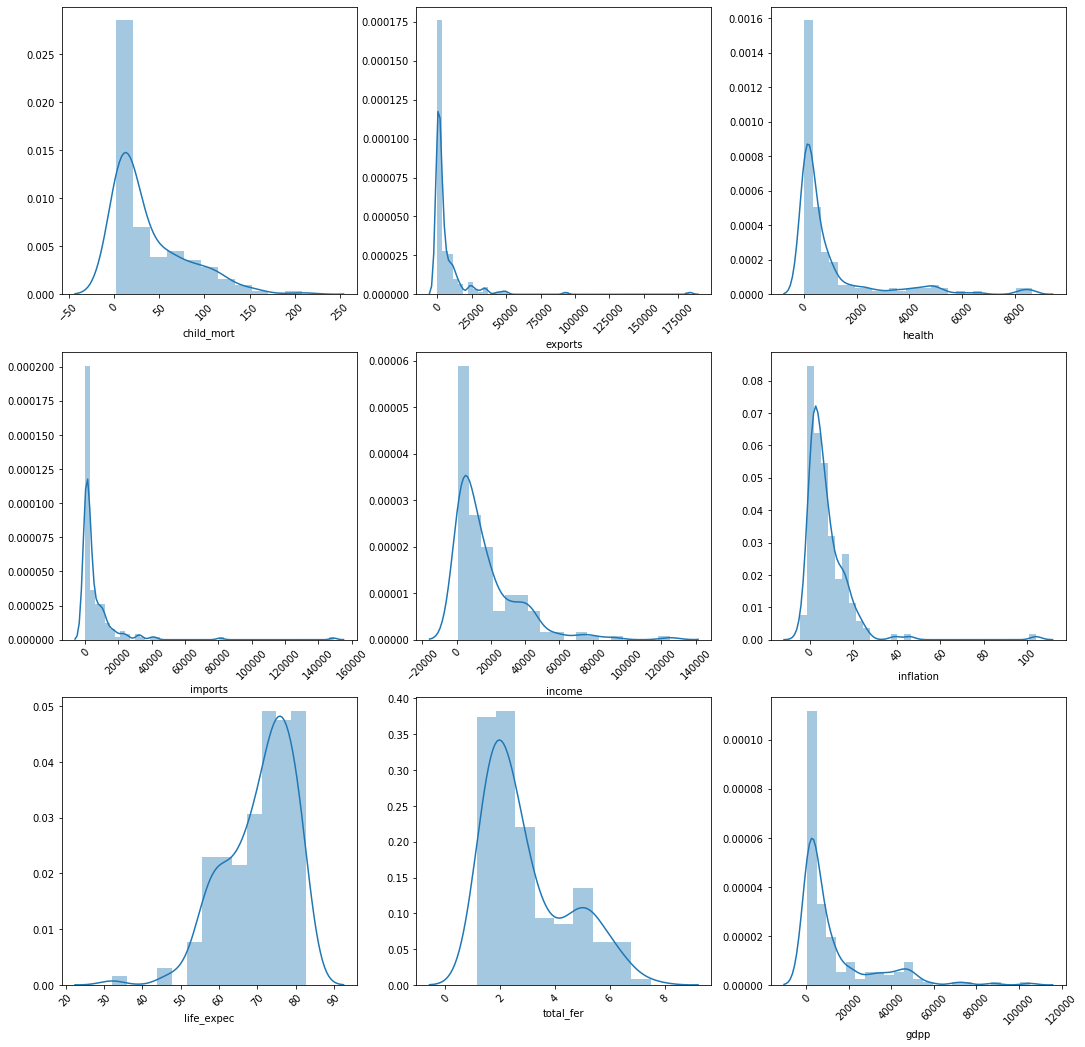

In [14]:
# ploting Distribution curve
plt.figure(figsize  = (18,18))

for i in enumerate(df.columns[1:]):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])
    plt.xticks(rotation=45)

### From the above plots we can observe following:
-  cluster profiling is possible on child_mort,inflation, GDPP,exports,imports, Income , life_expec, Total_fer  

## SubTask 3.1 
# Outlier Treatment

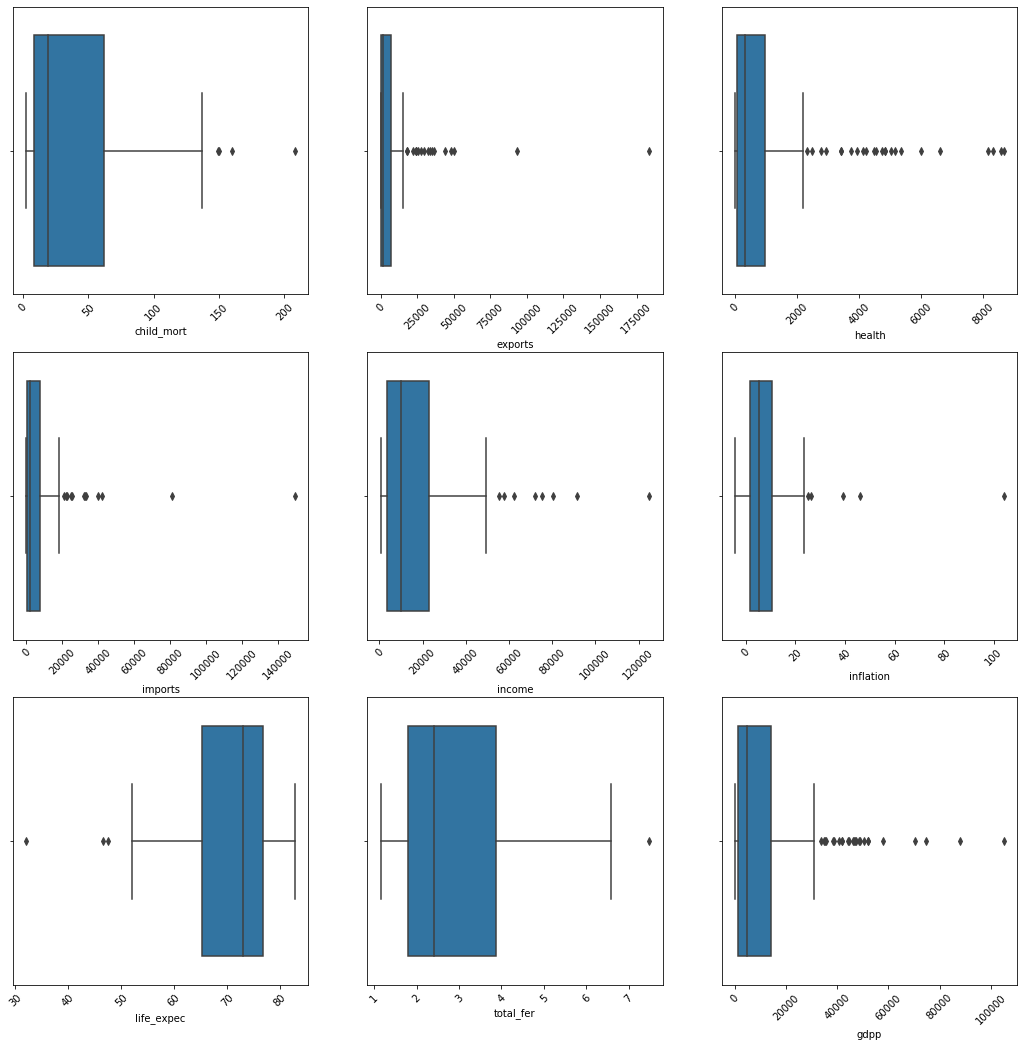

In [15]:
# box plot for finding outliers
plt.figure(figsize  = (18,18))
for i in enumerate(df.columns[1:]):
    plt.subplot(3,3,i[0]+1)
    plt.xticks(rotation=45)
    sns.boxplot(df[i[1]])

# From above plots we can observe the following:
- Upper outliers exist for child_mort, exports,imports,inflation,health, income, total_fer,and GDPP
- Lower Outliers exist in Life_expec
### As we need to find the direst need of AID, so we should not treat the upper outliers of Child_mort and Inflation.

# For analysis purpose we are treating the upper outliers using Capping 

In [16]:
# looking into  different Percentile
df.describe(percentiles = [0,0.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,0.99,1])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
0%,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
10%,4.200000,110.224800,36.502560,211.005600,1524.000000,0.587800,57.820000,1.452000,593.800000
20%,6.320000,294.268000,55.060000,409.998800,2548.000000,1.408000,61.880000,1.630000,1146.000000
30%,10.380000,632.240000,108.357000,1021.992000,4488.000000,2.326000,66.280000,1.912000,2170.000000
40%,15.280000,1166.480000,190.044600,1500.288000,7320.000000,3.700000,70.060000,2.144000,3262.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000


### Considering the Capping to treat the upper outliers 

In [17]:
# Outliers Capping for all the columns (except child_mort and inflation)
for col in df.columns[1:]:
    if (col != 'inflation') and (col != 'child_mort'):
        percentiles = df[col].quantile(0.99)
        df[col][df[col] >= percentiles] = percentiles

In [18]:
# looking into  different Percentile after Capping Outliers
df.describe(percentiles = [0,0.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,0.99,1])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6538.214776,1054.206622,5873.135222,16857.550898,7.781832,70.551138,2.942259,12756.826347
std,40.328931,11415.308590,1790.845342,9422.700869,17957.012855,10.570704,8.886987,1.498340,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
0%,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
10%,4.200000,110.224800,36.502560,211.005600,1524.000000,0.587800,57.820000,1.452000,593.800000
20%,6.320000,294.268000,55.060000,409.998800,2548.000000,1.408000,61.880000,1.630000,1146.000000
30%,10.380000,632.240000,108.357000,1021.992000,4488.000000,2.326000,66.280000,1.912000,2170.000000
40%,15.280000,1166.480000,190.044600,1500.288000,7320.000000,3.700000,70.060000,2.144000,3262.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000


#### We can observe that all the columns having upper outliers are capped to 99% except Child_Mort and Inflation 

# Task 4 
### Measuring the cluster tendency (Hopkins Statistics)
 - Find the cluster tendency

In [19]:
# to check, if data is fit for clustering or not:
# calculating the Hopkins Statistic

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1] # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]

    
    nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(X.values)

    
    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis =0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

        
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd,wjd)
        H = 0
    
    return H

In [20]:
# Finding the Mean value of Hopkins:

import statistics as stat
n = input()
n= int(n) # Enter the no, to run the  Hopkins Stats 
print('No. of time Hopkins stats run:',n)
lis = []
for i in range(n):
    lis.append(hopkins(df.drop(('country'),axis = 1)))
H =  stat.mean(lis)  
print('The Mean Value of Hopkins is:',round(H,2))

if H < 0.50:
    print('***"Data is not good for Cluster"***')
elif H > 0.50 and H < 0.8:
    print('***"Data is good for Cluster"***')
else:
    print('***"Data is very good for Cluster"***')
    

100
No. of time Hopkins stats run: 100
The Mean Value of Hopkins is: 0.91
***"Data is very good for Cluster"***


## SubTask 4.1 
# Scaling
### Scaling is performed on the columns

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df.drop(('country'),axis = 1))
df1 = pd.DataFrame(df1)
df1.columns = df.drop(('country'),axis =1).columns
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619705,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.648831,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.671403,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179541,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.705262,-0.543736,-0.032042


# Task 5
### Find the KMean Value used for analysis:
- Silhouette Score
- Elbow Curve

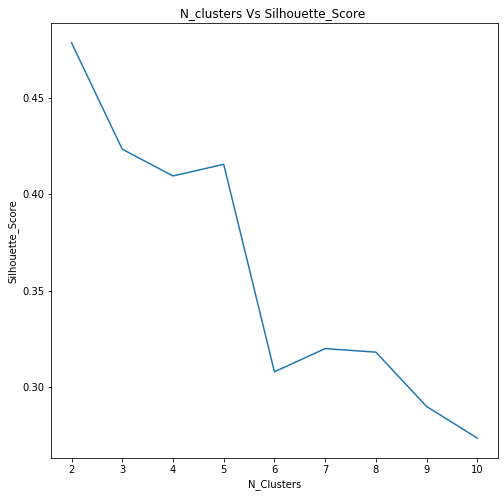

In [22]:
# Silhouette Score
from sklearn.metrics import silhouette_score
ss = []
plt.figure(figsize = (8,8))
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k,silhouette_score(df1,kmeans.labels_)])
    
df_ss = pd.DataFrame(ss)
plt.plot(df_ss[0],df_ss[1])
plt.title("N_clusters Vs Silhouette_Score ")
plt.ylabel('Silhouette_Score')
plt.xlabel('N_Clusters')
plt.show()

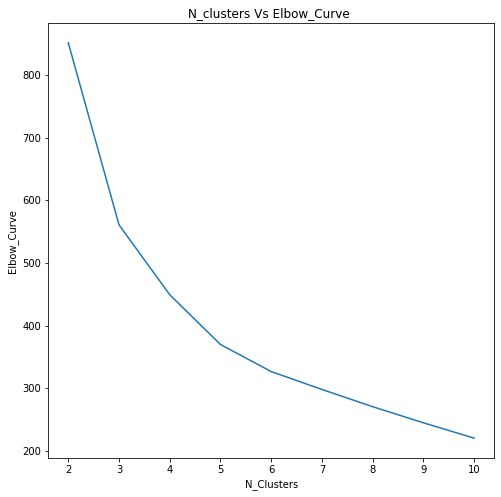

In [23]:
roc = []
plt.figure(figsize = (8,8))
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    roc.append([k,kmeans.inertia_])
    
df_roc = pd.DataFrame(roc)
plt.plot(df_roc[0],df_roc[1])
plt.title("N_clusters Vs Elbow_Curve ")
plt.ylabel('Elbow_Curve')
plt.xlabel('N_Clusters')
plt.show()

### From the above plots of we can observe the following:
- Silhouette Score for n_clusters 3 (excluding n_clusters = 2) is high as compared to others
- from Elbow curve we can observe the bend at point 3 (n_clusters = 3)

### As 3 is satified in both the plots ,  we are considering the no of culters as 3 for analysis

# Task 6
# KMean Clustering


In [24]:
# K = 3 ..as final choice
kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [25]:
# checking the labels
kmean.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [26]:
df_kmean = df.copy()

In [27]:
label = pd.DataFrame(kmean.labels_)
label.columns = ['KMeans_label']
label.head()

,KMeans_label
0,2
1,0
2,0
3,2
4,0


In [28]:
df_kmean = pd.concat([df_kmean,label],axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


# subTask 6.1
### Cluster Profiling
Visualization: GDPP - Income, Income - Child_mort, GDPP - Child_mort

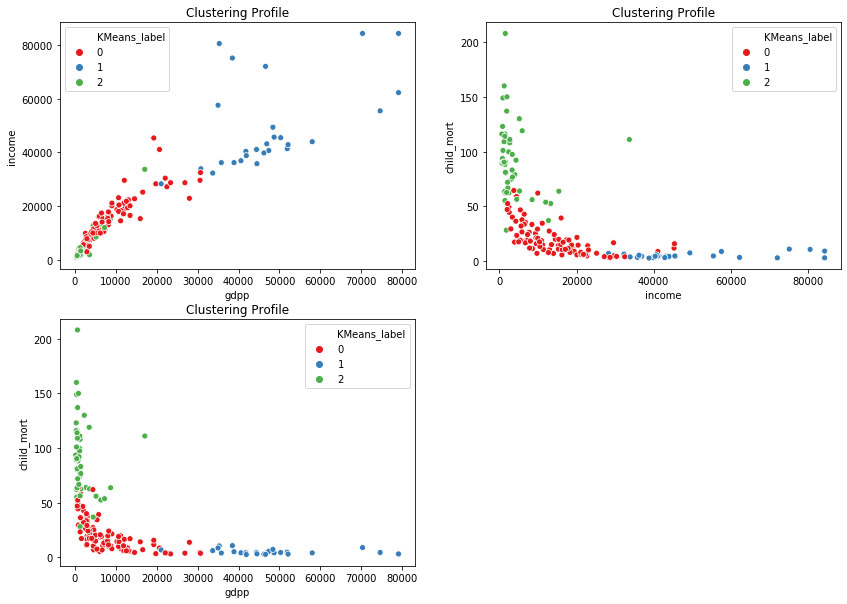

In [29]:
# Cluster Profiling 
plt.figure(figsize = (14,10))

plt.subplot(2,2,1)
sns.scatterplot(x = 'gdpp', y = 'income',hue = 'KMeans_label', data = df_kmean, palette = "Set1")
plt.title ('Clustering Profile')
plt.subplot(2,2,2)
sns.scatterplot(x = 'income', y = 'child_mort',hue = 'KMeans_label', data = df_kmean, palette = "Set1")
plt.title ('Clustering Profile')
plt.subplot(2,2,3)
sns.scatterplot(x = 'gdpp', y = 'child_mort',hue = 'KMeans_label', data = df_kmean, palette = "Set1")
plt.title ('Clustering Profile')
plt.show()

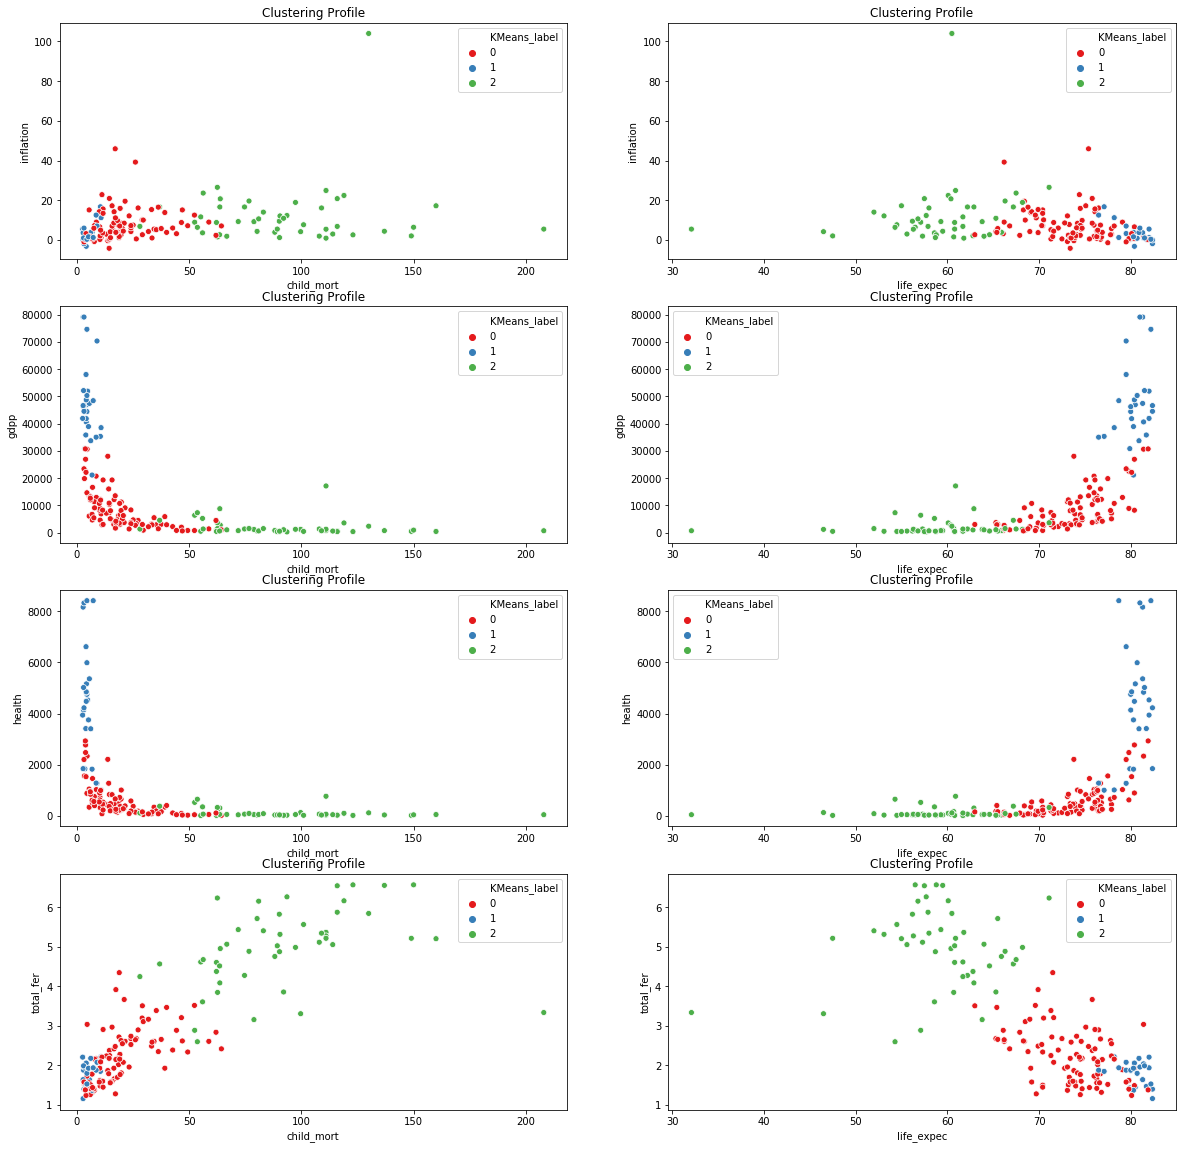

In [30]:
# Cluster Profiling 
plt.figure(figsize = (20,20))
plt.subplot(4,2,1)
sns.scatterplot(y = 'inflation', x = 'child_mort',hue = 'KMeans_label', data = df_kmean, palette = "Set1")
plt.title ('Clustering Profile')
plt.subplot(4,2,2)
sns.scatterplot(y = 'inflation', x = 'life_expec',hue = 'KMeans_label', data = df_kmean, palette = "Set1")
plt.title ('Clustering Profile')
plt.subplot(4,2,3)
sns.scatterplot(y = 'gdpp', x = 'child_mort',hue = 'KMeans_label', data = df_kmean, palette = "Set1")
plt.title ('Clustering Profile')
plt.subplot(4,2,4)
sns.scatterplot(y = 'gdpp', x = 'life_expec',hue = 'KMeans_label', data = df_kmean, palette = "Set1")
plt.title ('Clustering Profile')
plt.subplot(4,2,5)
sns.scatterplot(x = 'child_mort', y = 'health',hue = 'KMeans_label', data = df_kmean, palette = "Set1")
plt.title ('Clustering Profile')
plt.subplot(4,2,6)
sns.scatterplot(x = 'life_expec', y = 'health',hue = 'KMeans_label', data = df_kmean, palette = "Set1")
plt.title ('Clustering Profile')
plt.subplot(4,2,7)
sns.scatterplot(y = 'total_fer', x = 'child_mort',hue = 'KMeans_label', data = df_kmean, palette = "Set1")
plt.title ('Clustering Profile')
plt.subplot(4,2,8)
sns.scatterplot(y = 'total_fer', x = 'life_expec',hue = 'KMeans_label', data = df_kmean, palette = "Set1")
plt.title ('Clustering Profile')
plt.show()



# From the above plots we can observe the following:
-  Inflation effect on child_mort and Life_expec :
    - except on data point there in no much impact on inflation
- GDPP effect on Child_mort and Life_expec:
    - higher the GDPP lower the child_mort and higher life_expec
- Higher spending on health there is a lower child_mort and Higher Life_expec
- Higher the total_fer, lower in life_expec and higher child_mort

In [31]:
# Mean values in the clusters
df_kmean[['gdpp','child_mort','KMeans_label']].groupby('KMeans_label').mean()

,gdpp,child_mort
KMeans_label,,
0,8226.869565,20.177174
1,47476.888889,5.092593
2,1909.208333,91.610417


In [32]:
# Mean values in the clusters
df_kmean[['gdpp','income','KMeans_label']].groupby('KMeans_label').mean()

,gdpp,income
KMeans_label,,
0,8226.869565,14169.456522
1,47476.888889,49057.333333
2,1909.208333,3897.354167


In [33]:
# Mean values in the clusters
df_kmean[['income','child_mort','KMeans_label']].groupby('KMeans_label').mean()

,income,child_mort
KMeans_label,,
0,14169.456522,20.177174
1,49057.333333,5.092593
2,3897.354167,91.610417


In [34]:
# Cluster Segregation
df_kmean.KMeans_label.value_counts()

0    92
2    48
1    27
Name: KMeans_label, dtype: int64

In [35]:
# from the above Cluster Profile we can see there is high Child_mort  in Cluster label 2 (KMeans Cluster)
# creating the dataframe with values containing high child_mort
df_2 = df_kmean[df_kmean['KMeans_label']==2]
df_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_label
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2


In [36]:
# top 5 countries having high Child_mort with low GDPP and  Income
df_2.sort_values(['child_mort','gdpp','income'], ascending = [False,True,True]).country.head()

66                        Haiti
132                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
Name: country, dtype: object

# Task 7
## Hierarchical Clustering
- Single Linkage
- Complete Linkage

In [37]:
# import Libraries for Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Single Linkage

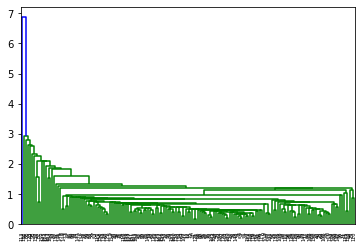

In [38]:
# single Linkage
mergings_1 = linkage(df1,method= 'single', metric = 'euclidean')
dendrogram(mergings_1)
plt.show()

In [39]:
# 3 clusters using cut_tree
cut_tree(mergings_1,n_clusters = 3).shape

(167, 1)

In [40]:
# labels generated from the Single linkage
H_single = cut_tree(mergings_1,n_clusters = 3).reshape(-1,)
H_single

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
# assign the cluster labels
H_single = pd.DataFrame(H_single)
H_single.columns = ['H_Slabel']
H_single.head()

,H_Slabel
0,0
1,0
2,0
3,0
4,0


In [42]:
# Concating the DataFrames
df_single = pd.concat([df_kmean,H_single],axis =1)
df_single.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_label,H_Slabel
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0


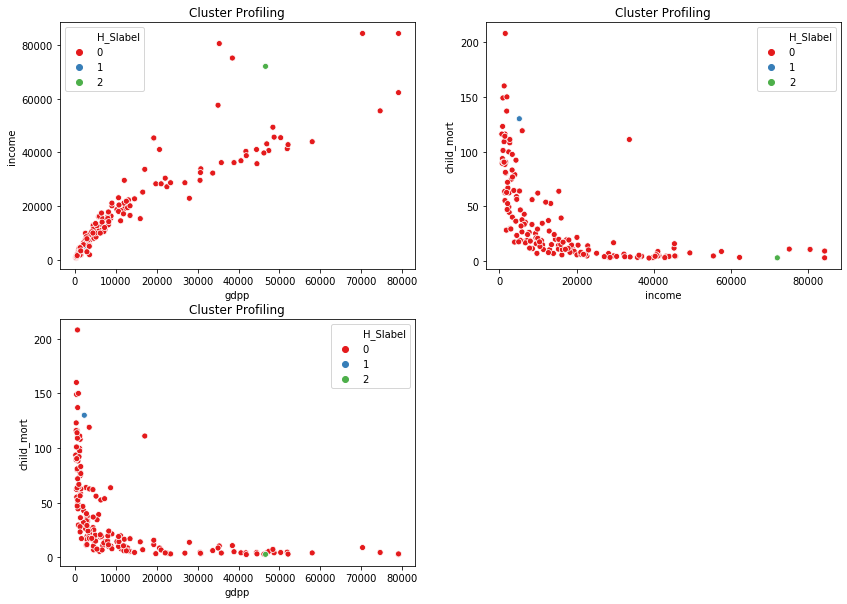

In [43]:
# Cluster Profiling (Single Linkage)
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.scatterplot(x = 'gdpp', y = 'income',hue = 'H_Slabel', data = df_single, palette = "Set1")
plt.title('Cluster Profiling')
plt.subplot(2,2,2)
sns.scatterplot(x = 'income', y = 'child_mort',hue = 'H_Slabel', data = df_single, palette = "Set1")
plt.title('Cluster Profiling')
plt.subplot(2,2,3)
sns.scatterplot(x = 'gdpp', y = 'child_mort',hue = 'H_Slabel', data = df_single, palette = "Set1")
plt.title('Cluster Profiling')
plt.show()

In [44]:
# Cluster Segregation
df_single.H_Slabel.value_counts()

0    165
2      1
1      1
Name: H_Slabel, dtype: int64

#### The following are observed from  the above clustring Profile and Value counts of Single Linkage :
- Only one cluster is dominating other clusters i.e. cluster label 0
- The total count of cluster label 0 is 165
- other cluster label is having one count each

# Hence Sinlge Linkage Cluster is not used in the further analysis

### Complete Linkage

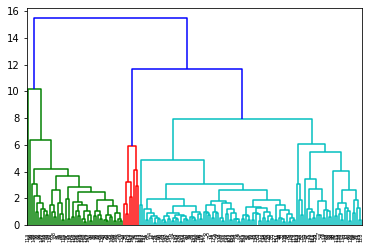

In [45]:
# complete linkage;
mergings = linkage(df1,method= 'complete', metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [46]:
# 3 clusters using cut_tree
cut_tree(mergings,n_clusters = 3).shape

(167, 1)

In [47]:
# checking the labels for hierarchical clustering
H_labels = cut_tree(mergings,n_clusters = 3).reshape(-1,)
H_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [48]:
# assign the cluster labels
H_labels = pd.DataFrame(H_labels)
H_labels.columns = ['H_Clabel']
H_labels.head()

,H_Clabel
0,0
1,1
2,1
3,0
4,1


In [49]:
# The final DataFrame  after concating the labels generated from KMean and Hierarchical Clusters
df_final = pd.concat([df_single,H_labels],axis = 1)
df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_label,H_Slabel,H_Clabel
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0,1


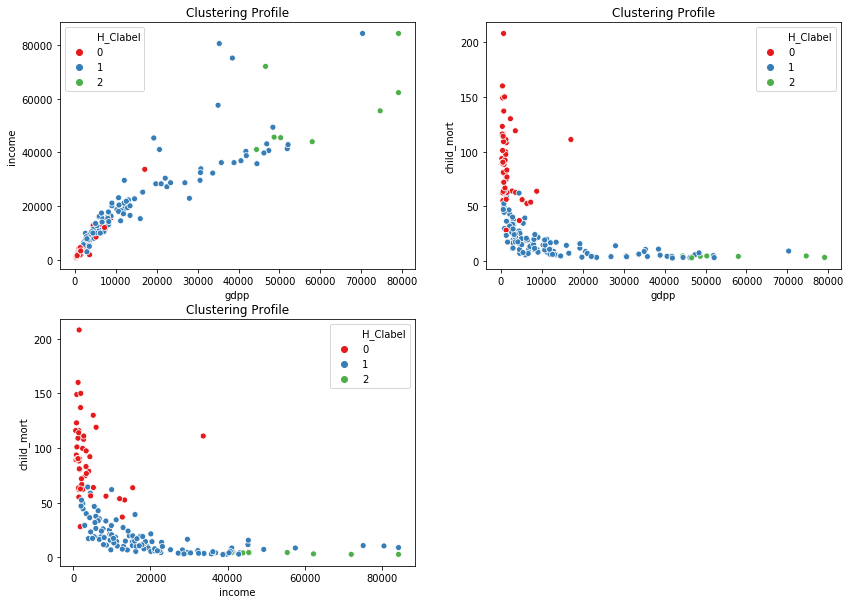

In [50]:
# clustering Profile
plt.figure(figsize = (14,10))

plt.subplot(2,2,1)
sns.scatterplot(x = 'gdpp', y = 'income',hue = 'H_Clabel', data = df_final, palette = "Set1")
plt.title ('Clustering Profile')
plt.subplot(2,2,2)
sns.scatterplot(x = 'gdpp', y = 'child_mort',hue = 'H_Clabel', data = df_final, palette = "Set1")
plt.title ('Clustering Profile')
plt.subplot(2,2,3)
sns.scatterplot(x = 'income', y = 'child_mort',hue = 'H_Clabel', data = df_final, palette = "Set1")
plt.title ('Clustering Profile')
plt.show()

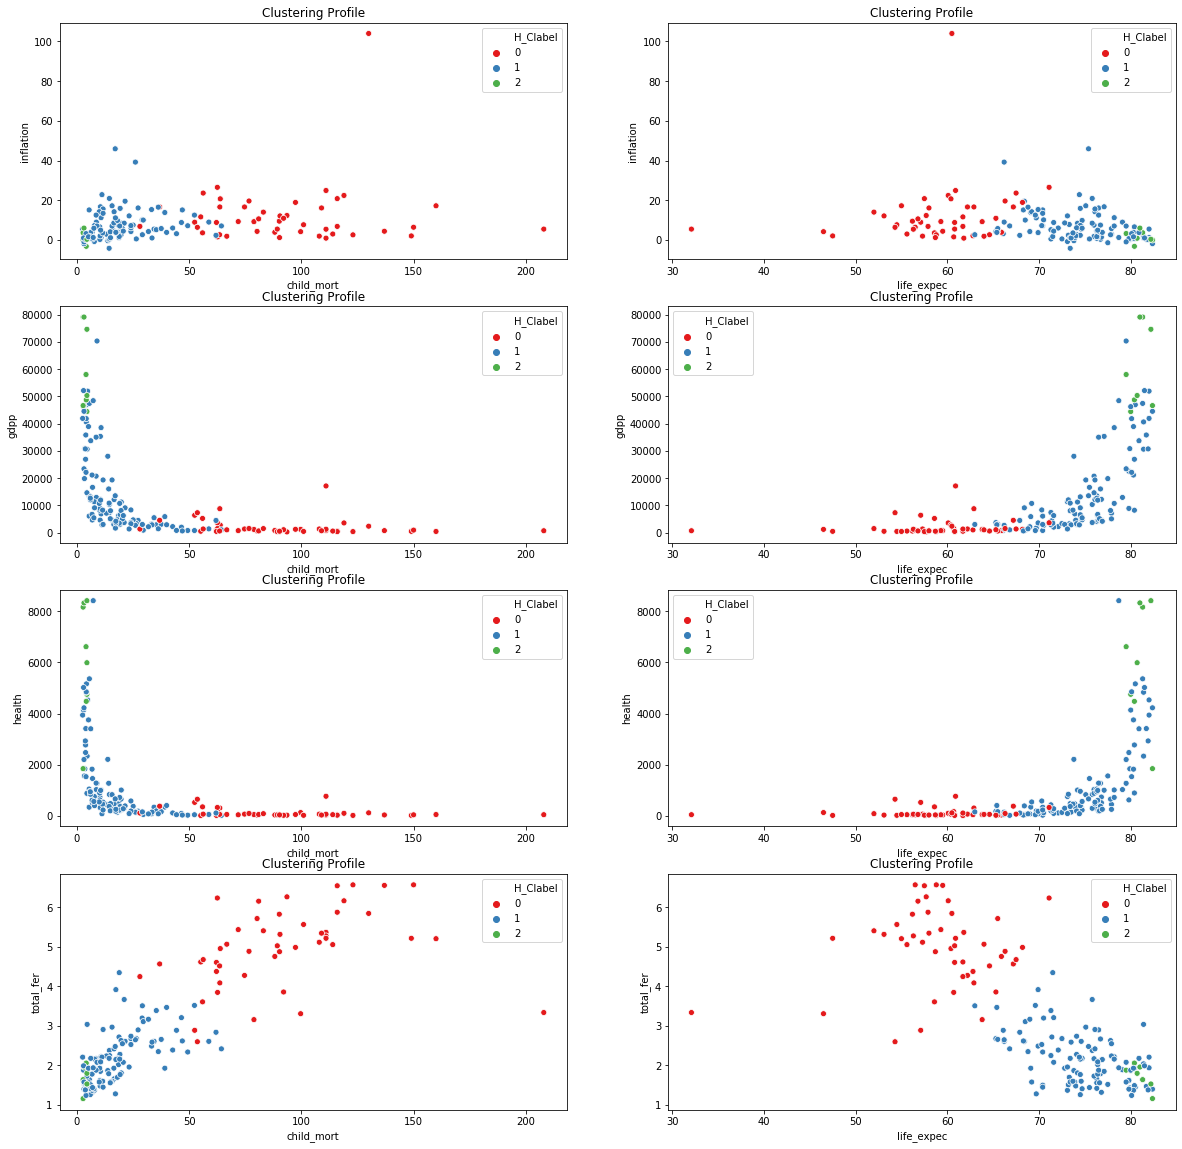

In [51]:
# Cluster Profiling 
plt.figure(figsize = (20,20))
plt.subplot(4,2,1)
sns.scatterplot(y = 'inflation', x = 'child_mort',hue = 'H_Clabel', data = df_final, palette = "Set1")
plt.title ('Clustering Profile')
plt.subplot(4,2,2)
sns.scatterplot(y = 'inflation', x = 'life_expec',hue = 'H_Clabel', data = df_final, palette = "Set1")
plt.title ('Clustering Profile')
plt.subplot(4,2,3)
sns.scatterplot(y = 'gdpp', x = 'child_mort',hue = 'H_Clabel', data = df_final, palette = "Set1")
plt.title ('Clustering Profile')
plt.subplot(4,2,4)
sns.scatterplot(y = 'gdpp', x = 'life_expec',hue = 'H_Clabel', data = df_final, palette = "Set1")
plt.title ('Clustering Profile')
plt.subplot(4,2,5)
sns.scatterplot(x = 'child_mort', y = 'health',hue = 'H_Clabel', data = df_final, palette = "Set1")
plt.title ('Clustering Profile')
plt.subplot(4,2,6)
sns.scatterplot(x = 'life_expec', y = 'health',hue = 'H_Clabel', data = df_final, palette = "Set1")
plt.title ('Clustering Profile')
plt.subplot(4,2,7)
sns.scatterplot(y = 'total_fer', x = 'child_mort',hue = 'H_Clabel', data = df_final, palette = "Set1")
plt.title ('Clustering Profile')
plt.subplot(4,2,8)
sns.scatterplot(y = 'total_fer', x = 'life_expec',hue = 'H_Clabel', data = df_final, palette = "Set1")
plt.title ('Clustering Profile')
plt.show()


# Similar points can be observed as seen in KMeans Clusters:
-  Inflation effect on child_mort and Life_expec :
    - except on data point there in no much impact on inflation
- GDPP effect on Child_mort and Life_expec:
    - higher the GDPP lower the child_mort and higher life_expec
- Higher spending on health there is a lower child_mort and Higher Life_expec
- Higher the total_fer, lower in life_expec and higher child_mort

In [52]:
# Cluster Segregation
df_final.H_Clabel.value_counts()

1    111
0     48
2      8
Name: H_Clabel, dtype: int64

In [53]:
# from the above Cluster Profile we can see there is high Child_mort  in Cluster label 0 (Hierarchical Cluster: Complete Linkage )
# creating the dataframe with values containing high child_mort
df_H0 = df_final[df_final['H_Clabel']==0]
df_H0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_label,H_Slabel,H_Clabel
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2,0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2,0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2,0,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,2,0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2,0,0


In [54]:
# top 5 countries having high Child_Mort
df_H0.sort_values(['child_mort','gdpp','income'], ascending = [False,True,True]).country.head()

66                        Haiti
132                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
Name: country, dtype: object

### Comparing the KMeans and Hierarchical Clustering

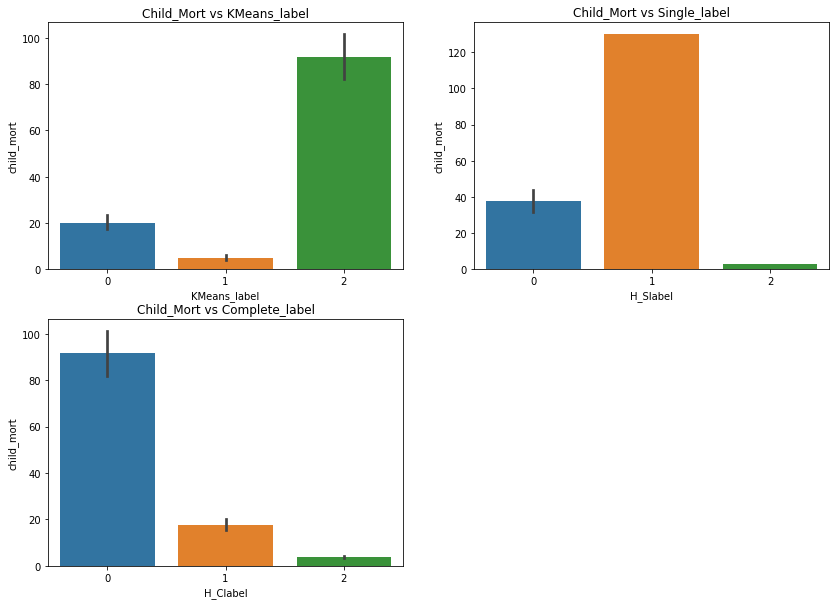

In [55]:
# comparing Clusters in KMean and Hierarchical Clustering
plt.figure(figsize= (14,10))
plt.subplot(2,2,1)
sns.barplot(x='KMeans_label',y = 'child_mort',data =df_final)
plt.title('Child_Mort vs KMeans_label')
plt.subplot(2,2,2)
sns.barplot(x='H_Slabel',y = 'child_mort',data =df_final)
plt.title('Child_Mort vs Single_label')
plt.subplot(2,2,3)
sns.barplot(x='H_Clabel',y = 'child_mort',data =df_final)
plt.title('Child_Mort vs Complete_label')
plt.show()

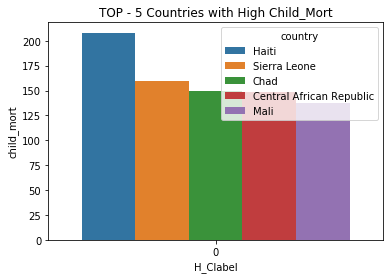

In [56]:
# ploting top 5 countries where child_mort is high using Hierarchical Cluster (Complete Linkage)
sns.barplot(x='H_Clabel',y = 'child_mort',hue = 'country',data =df_H0.sort_values(['child_mort','gdpp','income'], ascending = [False,True,True]).head())
plt.title('TOP - 5 Countries with High Child_Mort')
plt.show()

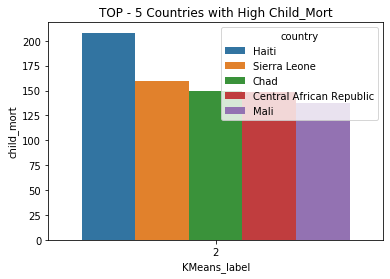

In [57]:
# ploting top 5 countries where child_mort is high using KMeans Clustering
sns.barplot(x='KMeans_label',y = 'child_mort',hue = 'country',data =df_2.sort_values(['child_mort','gdpp','income'], ascending = [False,True,True]).head())
plt.title('TOP - 5 Countries with High Child_Mort')
plt.show()

### From the above comparasion, Both clusters show the same top - 5 countries. They are:(from highest child_mort to least)
- ### Haiti
- ### Sierra Leone
- ### Chad
- ### Central African Republic
- ### Mali

## Conslusion :
- ### Inflation effect on child_mort and Life_expec :
    - ### except on data point there in no much impact on inflation
- ### GDPP effect on Child_mort and Life_expec:
    - ### higher the GDPP lower the child_mort and higher life_expec
- ### Higher spending on health there is a lower child_mort and Higher Life_expec
- ### Higher the total_fer, lower in life_expec and higher child_mort
- ### The top 5 Countries which are in need of direst AID are:
    - ### Haiti
    - ### Sierra Leone
    - ### Chad
    - ### Central African Republic
    - ### Mali 
- ## The most of African countires are in top - 5 which are in need of direst AID
    